In [1]:
%conda install matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1s             |       h0b41bf4_1         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following packages will be UPDATED:

  openssl                                 1.1.1s-h166bdaf_0 --> 1.1.1s-h0b41bf4_1



openssl-1.1.1s       | 1.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to rest

In [2]:
%conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
%conda install pandas

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
%conda install numpy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda update -n base conda

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-2.0.2|     pyh38be061_0         247 KB  conda-forge
    conda-package-streaming-0.7.0|     pyhd8ed1ab_1          17 KB  conda-forge
    libstdcxx-ng-12.2.0        |      h46fd767_19         4.3 MB  conda-forge
    openssl-3.0.7              |       h0b41bf4_1         2.5 MB  conda-forge
    tzdata-2022g               |       h191b570_0         106 KB  conda-forge
    zstandard-0.19.0           |   py39h29414ee_1         373 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.5 MB

The following NEW packages will be INSTALLED:

  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4
  conda-package-str

In [6]:
%conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
conda update -n base conda

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - conda


The following NEW packages will be INSTALLED:

  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4
  conda-package-str~ conda-forge/noarch::conda-package-streaming-0.7.0-pyhd8ed1ab_1
  libnsl             conda-forge/linux-64::libnsl-2.0.0-h7f98852_0
  libsqlite          conda-forge/linux-64::libsqlite-3.40.0-h753d276_0
  libuuid            conda-forge/linux-64::libuuid-2.32.1-h7f98852_1000
  libzlib            conda-forge/linux-64::libzlib-1.2.13-h166bdaf_4
  toolz              conda-forge/noarch::toolz-0.12.0-pyhd8ed1ab_0
  zstandard          conda-forge/linux-64::zstandard-0.19.0-py39h29414ee_1
  zstd               conda-forge/linux-64::zstd-1.5.2-h6239696_4

The following packages will be REMOVED:

  chardet-4.0.0-py39hf3d152e_1
  colorama-0.4.4-pyh9f0ad1d_0
  six-1.16.0-pyh6c4a22f_0
  sqlite-3.36.0-h9cd32fc_2
  tqdm-4.62.3-pyhd8ed1ab_0
  zlib-1.2.1

## A bit of data science work/wonk

## Speed of vectorization, matrix math, using numpy arrays

In [8]:
import numpy as np
from math import log10 as log10
import random
from time import time
print("Libraries imported")

Libraries imported


In [9]:
# The log10 function takes your input number and finds what power you need to raise 10 to in order to product your input number.
print(np.log10(100))

2.0


In [10]:
#:et's set up some variables to run our comparative eercise
n = 10000000   #set variable n to 10,000,000

l1 = list(np.random.uniform(low = 1.0, high = 100.0, size = n)) # create a list of 10,000,000 random integers between 1 and 100

l2 = []

a1 = np.array(l1) # create a numpy array for list L1

print("Variables are all set.")
          

Variables are all set.


In [11]:
# Loop through L1 to find the log10 of each number, and keep track of the time 
t0 = time()

for i in l1:
    l2.append(log10(i))
    
loopTime = time()-t0

print('Loop time: ' + str(round(loopTime, 3)) + 'seconds')

Loop time: 2.477seconds


In [12]:
t0 = time()    #Again, start the timer.

a2 = np.log10(a1) #perform the funtion on the entire numpy array (matrix) at once

vectorTime = time() - t0

print('Vectorized time: ' + str(round(vectorTime, 3)) + 'seconds')

Vectorized time: 0.042seconds


In [13]:
#How much faster is vectorization than the Python loop?
ratio = (loopTime / vectorTime)
print("Ratio = " + str(round(ratio,3)))

Ratio = 59.454


## Conclusion

Vectorization speeds things up a lot. What used to be computed in a day can be done in an hour.

## On to the Titanic!

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [15]:
# Load training and test datasets into pandas dataframes

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [16]:
# Inspect your dataset, the first 5 rows

#some column/field definitions/explanations:
# Pclass = passenger class
# SibSp = # of siblings/spouses on board
# Parch = number of parents/children on board

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# Use pandas to display basic desciptive statistics
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
# Do the same with the test set
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


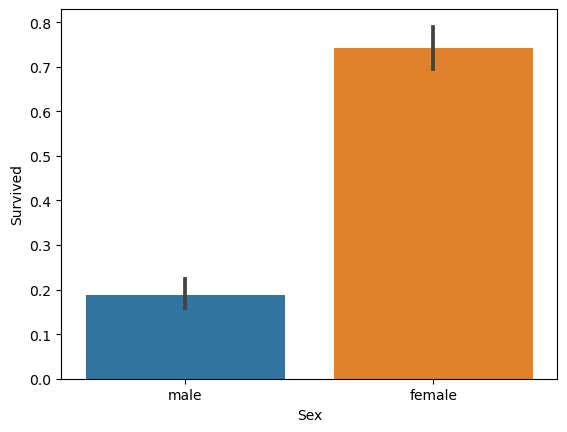

In [20]:
# Time for some vizualizations
# Who was more likely to survive, males or females?
# Use a seaborn bar graph

sns.barplot(x='Sex', y= 'Survived', data = train);

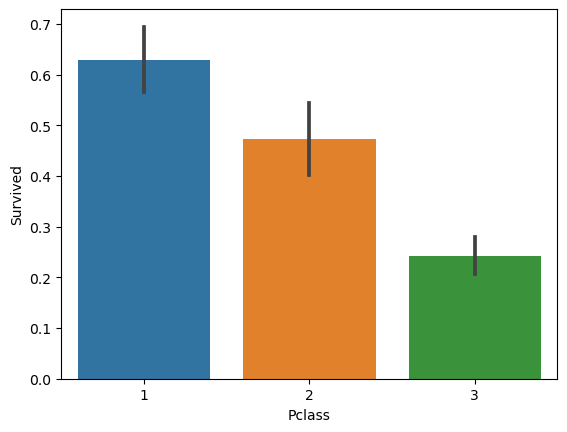

In [21]:
#Which socio-economic class was more likely to survive?

sns.barplot(x='Pclass' , y= 'Survived', data = train);

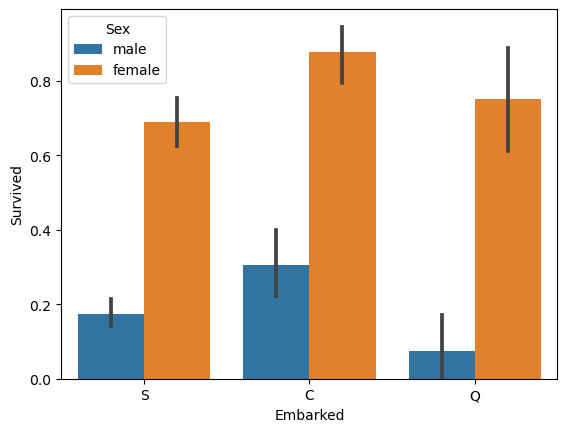

In [22]:
# Did the point of embarkation make a difference?

# C = Cherbourg(France), Q = Queenstown, S = Southampton

sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data=train);


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


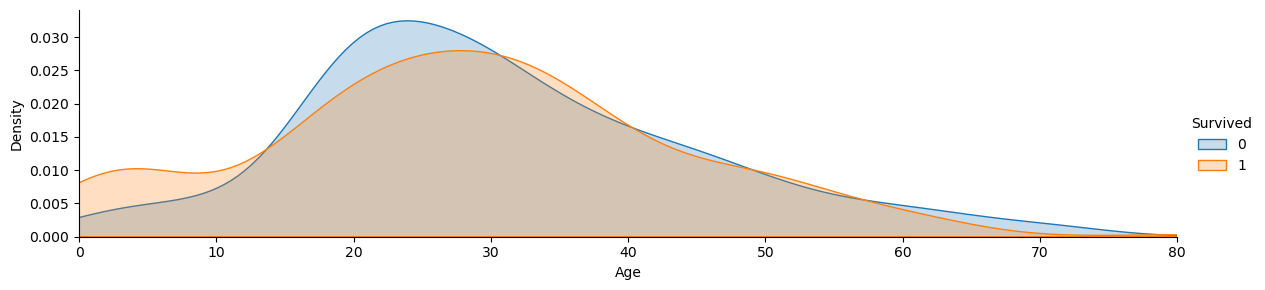

In [23]:
# What about age distribution?

a = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
a.map(sns.kdeplot, 'Age', shade= True)

a.set(xlim=(0, train['Age'].max()))
a.add_legend()



## What are we solving for? What's our dependent y variable?

## Survived (=1) or Died (=0)

In [24]:
y = train.Survived    #This y variable will store the 'survived' data

In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Now let's get the data ready

In [26]:
# Reformatthe data into pandas dataframes to get ready for Machine Learning algorithms
# We have to know the shape of these datasets later when we join and split them

train_shape = train.shape        # Get the columns and rows of the training data
train_rows = train.shape[0]      # Get number of rows from index 0
train_cols = train.shape[1]      # Get number of columns from index 1

print('The shape of train is ' + str(train_shape))
print('Our training set has ' + str(train_rows) + ' rows')
print('Our training set has ' + str(train_cols) + ' columns')

train.head()  # Displays the first few rows

The shape of train is (891, 12)
Our training set has 891 rows
Our training set has 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# DO the same thing for the test


test_shape = test.shape
test_rows = test.shape[0]
test_cols = test.shape[1]

print('Our test set has ' + str(test_rows) + ' rows')
print('Our test set has ' + str(test_cols) + ' columns')
test.head()

Our test set has 418 rows
Our test set has 11 columns


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
# Now concatenate the test and training sets together to make sure that they transform correctly. We will split them later.

combined = pd.concat((train,test))  # Combine the train and test dataframes together

combined_shape = combined.shape
combined_rows = combined.shape[0]
combined_cols = combined.shape[1]
print("Our concatenated set has " + str(combined_rows) + " rows")
print("Our concatenated set has " + str(combined_cols) + " columns") 
combined.head()

Our concatenated set has 1309 rows
Our concatenated set has 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# But what about the Survived column? It is in the train set, but not the test set.
#What are the entries in the combined dataset?
combined.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
254,1146,NaN,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S
700,701,1.0,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
404,405,0.0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
36,928,NaN,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
497,498,0.0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
388,1280,NaN,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
66,67,1.0,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S


In [30]:
# Now, we transform the data, take care of the nulls, and simplify it by arranging values into bins
# and drop irrelevant or difficult columns/fields.
# We will eliminate the survived column, because we already set the Survived data as our dependent variable y

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ["Unknown", "Baby" , "Child" , "Teenage", "Student", "Young Adult", "Adult", "Senior"]
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ["Unknown", "1_quartile", "2_quartile", "3_quartile", "4_quartile"]
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def drop_features(df):
    return df.drop(["Cabin", "Name", "Ticket", "PassengerId", "Survived"], axis = 1)
    

In [31]:
# Define a function to run those above, and run them

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = drop_features(df)
    return df
combined = transform_features(combined)
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,Student,1,0,1_quartile,S
1,1,female,Adult,1,0,4_quartile,C
2,3,female,Young Adult,0,0,1_quartile,S
3,1,female,Young Adult,1,0,4_quartile,S
4,3,male,Young Adult,0,0,2_quartile,S


In [32]:
#Now we will do one-hot encoding - essentially pivot the binned fields into columns of 1s and 0s
# for each bin value

combined = pd.get_dummies(combined)
combined.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_Unknown,Age_Baby,Age_Child,Age_Teenage,Age_Student,...,Age_Adult,Age_Senior,Fare_Unknown,Fare_1_quartile,Fare_2_quartile,Fare_3_quartile,Fare_4_quartile,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
# Load up the matrices, cahnges the pandas dataframes into numpy arrays, check fitting, 
# and split the data back into training and test sets

# Create an array from 'combined' that goes from start to 'train_rows'
X_train = combined[:train_rows]
print('X_train: ' + str(X_train.shape))


# Create an array from 'combined' that goes from 'train_rows' to the end 
X_test = combined[train_rows:]
print('X_test: ' + str(X_test.shape))

X_train: (891, 21)
X_test: (418, 21)


In [34]:
# Load up a pile of classification models and processing tools from the Scikit-learn machine learning library

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import  GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [35]:
# Create a list of names for these ML algos 

names = ['Logistic regression', 'k-Nearest Neighbor', 'Linear SVM', 'RBH SVM', \
         'Gaussian Process', 'Decision Tree', 'Random Forest', 'Adaboost', 'Naive Bayes']

# Create a list of classifiers

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel='linear', C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),]

## Loop through all the classifiers to see how they perform on the dataset

In [36]:
# Use the zip function in a for-loop to run the ML algos with their names
# Use the fit function to match the data to the y dependent variable in each ML algo
# Measure their scores and print the results

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y)
    accuracy = round(clf.score(X_train, y) * 100, 2)
    print(name, accuracy)

Logistic regression 82.15
k-Nearest Neighbor 87.21
Linear SVM 78.68
RBH SVM 90.12
Gaussian Process 85.75
Decision Tree 84.51
Random Forest 81.03
Adaboost 81.48
Naive Bayes 78.0


In [37]:
# Let's pick the winner, the Support Vector Machine w/ RBF kernel function
# Store the model's predictions for each input (feature vector)

clf = SVC(gamma=2, C=1)
clf.fit(X_train, y)
accuracy = round(clf.score(X_train, y) * 100, 2)
print("Our accuracy score is: " + str(accuracy))
predictions = clf.predict(X_test)

Our accuracy score is: 90.12


In [38]:
# Export our prediction into a file for use by the outside world

solution = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predictions})
solution.to_csv('best_fit.csv', index = False)

print('Prediction file has been created')

Prediction file has been created


In [39]:
best_fit = pd.read_csv('best_fit.csv')
best_fit.sample(20)

,PassengerId,Survived
217,1109,0
361,1253,1
253,1145,0
272,1164,1
350,1242,1
254,1146,0
409,1301,1
307,1199,1
284,1176,1
176,1068,1
